# 1. Library & Input data

In [359]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

from datetime import datetime
from unidecode import unidecode
from itertools import combinations

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

import category_encoders as ce

import re
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from sklearn import preprocessing

/kaggle/input/test-and-merge-all-file/arpu_test.csv
/kaggle/input/test-and-merge-all-file/merge_all_file.csv
/kaggle/input/test-and-merge-all-file/test_submission.csv
/kaggle/input/data-merge/test_data.csv
/kaggle/input/data-merge/train_data.csv
/kaggle/input/new-feature/recharge_features_extraction_0055am_03092020.csv
/kaggle/input/new-feature/loan_features_extraction_06092020_ver3.csv
/kaggle/input/new-feature/arpu_train_feature_raw_ver_3.csv
/kaggle/input/new-feature/temp_features_extraction_0002am_6_9_2020.csv
/kaggle/input/new-feature/arpu_test_feature_raw_ver_3.csv


In [360]:
# train = pd.read_csv('../input/data-handle/data_train_encoder.csv')
# test = pd.read_csv('../input/data-handle/data_test_encoder.csv')
# f2_train = pd.read_csv('../input/data-handle/data_train_encoder.csv')
# df2_test = pd.read_csv('../input/data-handle/data_test_encoder.csv')
# df_train = pd.read_csv('../input/test-and-merge-all-file/merge_all_file.csv')
# df_test  = pd.read_csv('../input/test-and-merge-all-file/arpu_test.csv')
# test_submission = pd.read_csv('../input/test-and-merge-all-file/test_submission.csv')
test_submission  = pd.read_csv('../input/test-and-merge-all-file/test_submission.csv')
arpu_train = pd.read_csv('../input/data-merge/train_data.csv')
arpu_test  = pd.read_csv('../input/data-merge/test_data.csv')



new_test = pd.read_csv('../input/new-feature/arpu_test_feature_raw_ver_3.csv')
new_train = pd.read_csv('../input/new-feature/arpu_train_feature_raw_ver_3.csv')
new_recharge = pd.read_csv('../input/new-feature/recharge_features_extraction_0055am_03092020.csv')
new_temp = pd.read_csv('../input/new-feature/temp_features_extraction_0002am_6_9_2020.csv')


###  Encode columns

In [361]:
new_test

,msisdn,age,age_bins,COL_15_TYPE,COL_17,COL_18,COL_19,COL_20,COL_21,COL_22,...,COL_27c,COL_27d,COL_16_F,COL_16_M,COL_17_year,COL_18_year,COL_17_month_year,COL_18_month_year,COL_17_upto_2019_10,COL_18_upto_2019_10
0,0001000cf619c9b3085d,23.0,"(22.0, 25.0]",COL_15_0,1.406352e+12,1.528529e+12,1325.000000,1166.000000,0.0,159.0,...,1251.151433,4.210,1,0,2014.0,2018.0,2014-07,2018-06,63.0,16.0
1,000100248d878d4558b2,45.0,"(40.0, 45.0]",COL_15_2,1.354547e+12,1.435043e+12,98020.542969,92391.042969,0.0,4579.5,...,14339.615263,25448.440,0,1,2012.0,2015.0,2012-12,2015-06,82.0,52.0
2,000100362c217ed2e556,NaN,NaN,NaN,NaN,NaN,17812.250000,13587.250000,0.0,3500.0,...,9805.962780,7993.485,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,000100645e3a4bd29c68,56.0,"(45.0, 60.0]",COL_15_1,1.258217e+12,1.527497e+12,144733.160156,66502.166016,0.0,78131.0,...,58294.091975,31636.050,0,1,2009.0,2018.0,2009-11,2018-05,119.0,17.0
4,00010073f9bc66ef77d3,37.0,"(30.0, 40.0]",COL_15_1,1.428636e+12,1.428636e+12,224438.242188,NaN,NaN,NaN,...,NaN,NaN,1,0,2015.0,2015.0,2015-04,2015-04,54.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57408,0001e5796e2195248577,34.0,"(30.0, 40.0]",COL_15_1,1.501781e+12,1.507110e+12,292436.093750,37051.090820,0.0,101485.0,...,23502.813625,26260.420,1,0,2017.0,2017.0,2017-08,2017-10,26.0,24.0
57409,0001e646841a1a424e9a,40.0,"(30.0, 40.0]",COL_15_1,1.383903e+12,1.456716e+12,38074.214371,2474.215103,0.0,0.0,...,7948.727444,5125.130,0,1,2013.0,2016.0,2013-11,2016-02,71.0,44.0
57410,0001ead2f3d27418edf0,28.0,"(25.0, 30.0]",COL_15_0,1.452590e+12,1.460363e+12,14021.950195,2750.449951,0.0,1271.5,...,1760.659777,25.930,0,1,2016.0,2016.0,2016-01,2016-04,45.0,42.0
57411,0001ede64d1753c7cceb,19.0,"(18.0, 22.0]",COL_15_0,1.505191e+12,1.505191e+12,59704.500000,15904.500000,0.0,750.0,...,6703.372331,10747.710,0,1,2017.0,2017.0,2017-09,2017-09,25.0,25.0


In [362]:
new_train

,msisdn,label,age,age_bins,COL_15_TYPE,COL_17,COL_18,COL_19,COL_20,COL_21,...,COL_27c,COL_27d,COL_16_F,COL_16_M,COL_17_year,COL_18_year,COL_17_month_year,COL_18_month_year,COL_17_upto_2019_10,COL_18_upto_2019_10
0,00010016bb53e8e3c82e,0,54.0,"(45.0, 60.0]",COL_15_1,1.509112e+12,1.356869e+12,90909.093750,NaN,NaN,...,NaN,NaN,0,1,2017.0,2012.0,2017-10,2012-12,24.0,82.0
1,0001007187b4881379a9,0,45.0,"(40.0, 45.0]",COL_15_1,1.164515e+12,1.456715e+12,28211.099609,6296.094971,0.0,...,11411.651071,23047.690,0,1,2006.0,2016.0,2006-11,2016-02,155.0,44.0
2,000100829f9d67fff3cc,1,52.0,"(45.0, 60.0]",COL_15_1,1.326463e+12,1.332176e+12,219060.570312,45312.064453,0.0,...,25150.943504,30748.625,0,1,2012.0,2012.0,2012-01,2012-03,93.0,91.0
3,000100a5e09da7ad6649,0,NaN,NaN,NaN,NaN,NaN,125431.250000,106981.250000,0.0,...,19134.960835,34260.940,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,000100d7f3d9e70f62b0,0,NaN,NaN,NaN,NaN,NaN,201915.429688,71909.789062,0.0,...,29537.371300,25494.170,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57716,0001e0e2c7aed96ff2fc,1,20.0,"(18.0, 22.0]",COL_15_0,1.379082e+12,1.524477e+12,92051.750000,71188.750000,0.0,...,8199.252786,6967.220,0,1,2013.0,2018.0,2013-09,2018-04,73.0,18.0
57717,0001f99f298dd21ce8c5,1,49.0,"(45.0, 60.0]",COL_15_2,1.314359e+12,1.314724e+12,29721.750000,29169.750000,0.0,...,25503.159943,112436.420,1,0,2011.0,2011.0,2011-08,2011-08,98.0,98.0
57718,0001fa0c3d21c0d758ec,1,44.0,"(40.0, 45.0]",COL_15_1,1.589706e+12,1.523678e+12,11575.500000,1575.500000,0.0,...,2071.746170,14682.500,1,0,2020.0,2018.0,2020-05,2018-04,-7.0,18.0
57719,0001fc8336def40dff4b,1,NaN,NaN,NaN,NaN,NaN,203570.437500,153645.437500,0.0,...,14373.828965,14608.580,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [363]:
new_train = new_train.drop(columns=['COL_17_month_year','COL_18_month_year'])
new_test = new_test.drop(columns=['COL_17_month_year','COL_18_month_year'])

In [364]:
new_recharge

,msisdn,COL_30_C,COL_30_V,num_arise_in_month_COL_30_C,num_arise_in_month_COL_30_V,num_trans_arise_month_COL_30,num_week_arise_trans_C_V_COL_30,num_days_trans_arise_month_COL_30,sum_money_C_COL_31,sum_money_V_COL_31,sum_money_C_V_COL_31,num_services_COL_30,max_money_C_COL_31,max_money_V_COL_31,max_money_C_V_COL_31,recharge_num_null_rows,min_money_C_COL_31,min_money_V_COL_31,min_money_C_V_COL_31
0,000100000eb52d2a47e1,1,0,1,0,1,1,1.0,50000.0,0.0,50000.0,1,50000.0,0.0,50000.0,30.0,50000.0,0.0,50000.0
1,000100001be537fce5cf,1,0,1,0,1,1,1.0,100000.0,0.0,100000.0,1,100000.0,0.0,100000.0,30.0,100000.0,0.0,100000.0
2,00010000e34bc5fff815,0,1,0,2,2,2,2.0,0.0,70000.0,70000.0,1,0.0,50000.0,50000.0,29.0,0.0,20000.0,20000.0
3,000100016510e7ef1501,0,1,0,3,3,2,2.0,0.0,200000.0,200000.0,1,0.0,100000.0,100000.0,29.0,0.0,50000.0,50000.0
4,00010001ccdec3a66936,0,1,0,3,3,1,1.0,0.0,90000.0,90000.0,1,0.0,50000.0,50000.0,30.0,0.0,20000.0,20000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115129,0001fffea32e0e44bff9,0,1,0,2,2,1,2.0,0.0,150000.0,150000.0,1,0.0,100000.0,100000.0,29.0,0.0,50000.0,50000.0
115130,0001ffff501a5473d949,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,31.0,0.0,0.0,0.0
115131,0001ffffe92102017b85,0,1,0,1,1,1,1.0,0.0,20000.0,20000.0,1,0.0,20000.0,20000.0,30.0,0.0,20000.0,20000.0
115132,1.21E+104,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,31.0,0.0,0.0,0.0


In [365]:
train_temp = new_temp[new_temp.msisdn.isin(list(new_train.msisdn))]
test_temp = new_temp[new_temp.msisdn.isin(list(new_test.msisdn))]
train_temp

,msisdn,COL_11_month_mean,UPLOAD_DATA_month_mean,num_partner_contact_month,num_services,num_be_called_by_partner_contact_month,total_call_time_second_month,COL_12_1.0,COL_12_2.0,COL_12_3.0,...,num_calls_part_of_day_morning,num_calls_part_of_day_night,temp_num_null_rows,total_call_time_second_month_afternoon,total_call_time_second_month_evening,total_call_time_second_month_morning,total_call_time_second_month_night,total_call_time_second_month_1.0,total_call_time_second_month_2.0,total_call_time_second_month_3.0
4,00010001ccdec3a66936,2.548997e+06,8.019778e+07,43,3.0,0.0,17182.0,1,1,0,...,112.0,0.0,0.0,7383.0,4227.0,5572.0,0.0,4585.0,12597.0,0.0
5,00010001f75b326c462b,0.000000e+00,0.000000e+00,222,2.0,1.0,108567.0,1,1,0,...,629.0,25.0,0.0,29150.0,44188.0,33616.0,1613.0,63056.0,45511.0,0.0
6,00010002c39aab3e6491,0.000000e+00,0.000000e+00,21,2.0,0.0,9761.0,1,1,0,...,48.0,0.0,7.0,4359.0,3966.0,1436.0,0.0,6383.0,3378.0,0.0
11,00010003b88135c84b19,0.000000e+00,0.000000e+00,19,2.0,0.0,3619.0,1,1,0,...,18.0,0.0,19.0,1079.0,561.0,1979.0,0.0,2648.0,971.0,0.0
15,000100041b6340a69b59,6.563995e+05,8.862282e+06,35,3.0,0.0,3058.0,1,1,0,...,20.0,0.0,2.0,1969.0,508.0,581.0,0.0,1974.0,1084.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115121,0001fffb4dc20b314447,0.000000e+00,0.000000e+00,40,2.0,0.0,9437.0,1,1,0,...,109.0,0.0,4.0,2540.0,2095.0,4802.0,0.0,2962.0,6475.0,0.0
115124,0001fffbeab265bfd4a8,0.000000e+00,0.000000e+00,143,2.0,0.0,27319.0,1,0,1,...,417.0,0.0,1.0,13873.0,581.0,12865.0,0.0,19595.0,0.0,7724.0
115127,0001fffdda8d1a8609f6,0.000000e+00,0.000000e+00,36,3.0,0.0,4418.0,1,1,1,...,49.0,0.0,4.0,1734.0,383.0,2301.0,0.0,2310.0,191.0,1917.0
115130,0001ffff501a5473d949,1.671111e+01,1.746667e+01,16,4.0,0.0,1158.0,1,1,1,...,24.0,0.0,16.0,411.0,102.0,645.0,0.0,300.0,855.0,3.0


In [366]:
train_recharge = new_recharge[new_recharge.msisdn.isin(list(new_train.msisdn))]
test_recharge  = new_recharge[new_recharge.msisdn.isin(list(new_test.msisdn))]
train_recharge

,msisdn,COL_30_C,COL_30_V,num_arise_in_month_COL_30_C,num_arise_in_month_COL_30_V,num_trans_arise_month_COL_30,num_week_arise_trans_C_V_COL_30,num_days_trans_arise_month_COL_30,sum_money_C_COL_31,sum_money_V_COL_31,sum_money_C_V_COL_31,num_services_COL_30,max_money_C_COL_31,max_money_V_COL_31,max_money_C_V_COL_31,recharge_num_null_rows,min_money_C_COL_31,min_money_V_COL_31,min_money_C_V_COL_31
4,00010001ccdec3a66936,0,1,0,3,3,1,1.0,0.0,90000.0,90000.0,1,0.0,50000.0,50000.0,30.0,0.0,20000.0,20000.0
5,00010001f75b326c462b,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,31.0,0.0,0.0,0.0
6,00010002c39aab3e6491,0,1,0,1,1,1,1.0,0.0,50000.0,50000.0,1,0.0,50000.0,50000.0,30.0,0.0,50000.0,50000.0
11,00010003b88135c84b19,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,31.0,0.0,0.0,0.0
15,000100041b6340a69b59,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,31.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115121,0001fffb4dc20b314447,0,1,0,3,3,3,3.0,0.0,120000.0,120000.0,1,0.0,50000.0,50000.0,28.0,0.0,20000.0,20000.0
115124,0001fffbeab265bfd4a8,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,31.0,0.0,0.0,0.0
115127,0001fffdda8d1a8609f6,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,31.0,0.0,0.0,0.0
115130,0001ffff501a5473d949,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,31.0,0.0,0.0,0.0


In [367]:
data_train = new_train 

data_train = pd.merge(data_train,train_recharge, on = 'msisdn')

data_train = pd.merge(data_train, train_temp, on = 'msisdn')

data_train

,msisdn,label,age,age_bins,COL_15_TYPE,COL_17,COL_18,COL_19,COL_20,COL_21,...,num_calls_part_of_day_morning,num_calls_part_of_day_night,temp_num_null_rows,total_call_time_second_month_afternoon,total_call_time_second_month_evening,total_call_time_second_month_morning,total_call_time_second_month_night,total_call_time_second_month_1.0,total_call_time_second_month_2.0,total_call_time_second_month_3.0
0,00010016bb53e8e3c82e,0,54.0,"(45.0, 60.0]",COL_15_1,1.509112e+12,1.356869e+12,90909.093750,NaN,NaN,...,64.0,1.0,3.0,5495.0,8403.0,3738.0,33.0,6461.0,11208.0,0.0
1,0001007187b4881379a9,0,45.0,"(40.0, 45.0]",COL_15_1,1.164515e+12,1.456715e+12,28211.099609,6296.094971,0.0,...,91.0,0.0,1.0,2656.0,1355.0,3115.0,0.0,6327.0,799.0,0.0
2,000100829f9d67fff3cc,1,52.0,"(45.0, 60.0]",COL_15_1,1.326463e+12,1.332176e+12,219060.570312,45312.064453,0.0,...,69.0,3.0,0.0,3628.0,4154.0,2390.0,64.0,5874.0,4362.0,0.0
3,000100a5e09da7ad6649,0,NaN,NaN,NaN,NaN,NaN,125431.250000,106981.250000,0.0,...,46.0,0.0,0.0,9165.0,2172.0,1155.0,0.0,8022.0,4470.0,0.0
4,000100d7f3d9e70f62b0,0,NaN,NaN,NaN,NaN,NaN,201915.429688,71909.789062,0.0,...,77.0,3.0,0.0,2353.0,5932.0,4140.0,2409.0,10395.0,4439.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57716,0001e0e2c7aed96ff2fc,1,20.0,"(18.0, 22.0]",COL_15_0,1.379082e+12,1.524477e+12,92051.750000,71188.750000,0.0,...,35.0,0.0,8.0,664.0,371.0,610.0,0.0,701.0,944.0,0.0
57717,0001f99f298dd21ce8c5,1,49.0,"(45.0, 60.0]",COL_15_2,1.314359e+12,1.314724e+12,29721.750000,29169.750000,0.0,...,89.0,1.0,1.0,4146.0,1721.0,2873.0,23.0,4582.0,4181.0,0.0
57718,0001fa0c3d21c0d758ec,1,44.0,"(40.0, 45.0]",COL_15_1,1.589706e+12,1.523678e+12,11575.500000,1575.500000,0.0,...,80.0,8.0,5.0,3470.0,4422.0,3692.0,119.0,7005.0,0.0,4698.0
57719,0001fc8336def40dff4b,1,NaN,NaN,NaN,NaN,NaN,203570.437500,153645.437500,0.0,...,85.0,3.0,0.0,5052.0,7902.0,3317.0,38.0,14171.0,2138.0,0.0


In [368]:
data_test = new_test 

data_test = pd.merge(data_test,test_recharge, on = 'msisdn')

data_test = pd.merge(data_test, test_temp, on = 'msisdn')

data_test

,msisdn,age,age_bins,COL_15_TYPE,COL_17,COL_18,COL_19,COL_20,COL_21,COL_22,...,num_calls_part_of_day_morning,num_calls_part_of_day_night,temp_num_null_rows,total_call_time_second_month_afternoon,total_call_time_second_month_evening,total_call_time_second_month_morning,total_call_time_second_month_night,total_call_time_second_month_1.0,total_call_time_second_month_2.0,total_call_time_second_month_3.0
0,0001000cf619c9b3085d,23.0,"(22.0, 25.0]",COL_15_0,1.406352e+12,1.528529e+12,1325.000000,1166.000000,0.0,159.0,...,13.0,0.0,13.0,309.0,252.0,648.0,0.0,513.0,696.0,0.0
1,000100248d878d4558b2,45.0,"(40.0, 45.0]",COL_15_2,1.354547e+12,1.435043e+12,98020.542969,92391.042969,0.0,4579.5,...,143.0,0.0,0.0,6125.0,3170.0,8049.0,0.0,10890.0,6454.0,0.0
2,000100362c217ed2e556,NaN,NaN,NaN,NaN,NaN,17812.250000,13587.250000,0.0,3500.0,...,124.0,0.0,0.0,2233.0,2126.0,5591.0,0.0,4471.0,5479.0,0.0
3,000100645e3a4bd29c68,56.0,"(45.0, 60.0]",COL_15_1,1.258217e+12,1.527497e+12,144733.160156,66502.166016,0.0,78131.0,...,52.0,2.0,0.0,1175.0,2989.0,1856.0,13.0,4999.0,1034.0,0.0
4,00010073f9bc66ef77d3,37.0,"(30.0, 40.0]",COL_15_1,1.428636e+12,1.428636e+12,224438.242188,NaN,NaN,NaN,...,232.0,0.0,0.0,13908.0,5080.0,19104.0,0.0,13734.0,24358.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57408,0001e5796e2195248577,34.0,"(30.0, 40.0]",COL_15_1,1.501781e+12,1.507110e+12,292436.093750,37051.090820,0.0,101485.0,...,1.0,0.0,26.0,42.0,10.0,10.0,0.0,36.0,26.0,0.0
57409,0001e646841a1a424e9a,40.0,"(30.0, 40.0]",COL_15_1,1.383903e+12,1.456716e+12,38074.214371,2474.215103,0.0,0.0,...,33.0,0.0,2.0,2209.0,1621.0,2167.0,0.0,5307.0,690.0,0.0
57410,0001ead2f3d27418edf0,28.0,"(25.0, 30.0]",COL_15_0,1.452590e+12,1.460363e+12,14021.950195,2750.449951,0.0,1271.5,...,18.0,1.0,10.0,189.0,105.0,336.0,7.0,331.0,306.0,0.0
57411,0001ede64d1753c7cceb,19.0,"(18.0, 22.0]",COL_15_0,1.505191e+12,1.505191e+12,59704.500000,15904.500000,0.0,750.0,...,30.0,3.0,6.0,459.0,1279.0,1275.0,42.0,810.0,2245.0,0.0


In [369]:
data_train

,msisdn,label,age,age_bins,COL_15_TYPE,COL_17,COL_18,COL_19,COL_20,COL_21,...,num_calls_part_of_day_morning,num_calls_part_of_day_night,temp_num_null_rows,total_call_time_second_month_afternoon,total_call_time_second_month_evening,total_call_time_second_month_morning,total_call_time_second_month_night,total_call_time_second_month_1.0,total_call_time_second_month_2.0,total_call_time_second_month_3.0
0,00010016bb53e8e3c82e,0,54.0,"(45.0, 60.0]",COL_15_1,1.509112e+12,1.356869e+12,90909.093750,NaN,NaN,...,64.0,1.0,3.0,5495.0,8403.0,3738.0,33.0,6461.0,11208.0,0.0
1,0001007187b4881379a9,0,45.0,"(40.0, 45.0]",COL_15_1,1.164515e+12,1.456715e+12,28211.099609,6296.094971,0.0,...,91.0,0.0,1.0,2656.0,1355.0,3115.0,0.0,6327.0,799.0,0.0
2,000100829f9d67fff3cc,1,52.0,"(45.0, 60.0]",COL_15_1,1.326463e+12,1.332176e+12,219060.570312,45312.064453,0.0,...,69.0,3.0,0.0,3628.0,4154.0,2390.0,64.0,5874.0,4362.0,0.0
3,000100a5e09da7ad6649,0,NaN,NaN,NaN,NaN,NaN,125431.250000,106981.250000,0.0,...,46.0,0.0,0.0,9165.0,2172.0,1155.0,0.0,8022.0,4470.0,0.0
4,000100d7f3d9e70f62b0,0,NaN,NaN,NaN,NaN,NaN,201915.429688,71909.789062,0.0,...,77.0,3.0,0.0,2353.0,5932.0,4140.0,2409.0,10395.0,4439.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57716,0001e0e2c7aed96ff2fc,1,20.0,"(18.0, 22.0]",COL_15_0,1.379082e+12,1.524477e+12,92051.750000,71188.750000,0.0,...,35.0,0.0,8.0,664.0,371.0,610.0,0.0,701.0,944.0,0.0
57717,0001f99f298dd21ce8c5,1,49.0,"(45.0, 60.0]",COL_15_2,1.314359e+12,1.314724e+12,29721.750000,29169.750000,0.0,...,89.0,1.0,1.0,4146.0,1721.0,2873.0,23.0,4582.0,4181.0,0.0
57718,0001fa0c3d21c0d758ec,1,44.0,"(40.0, 45.0]",COL_15_1,1.589706e+12,1.523678e+12,11575.500000,1575.500000,0.0,...,80.0,8.0,5.0,3470.0,4422.0,3692.0,119.0,7005.0,0.0,4698.0
57719,0001fc8336def40dff4b,1,NaN,NaN,NaN,NaN,NaN,203570.437500,153645.437500,0.0,...,85.0,3.0,0.0,5052.0,7902.0,3317.0,38.0,14171.0,2138.0,0.0


In [370]:
add_train = arpu_train.loc[:,['msisdn','COL_13','COL_14','COL_15']]
add_test = arpu_test.loc[:,['msisdn','COL_13','COL_14','COL_15']]

data_train = pd.merge(data_train, add_train, on = 'msisdn')
data_test = pd.merge(data_test, add_test, on = 'msisdn')
data_train = data_train.drop(columns=['age_bins','age'])
data_test  = data_test.drop(columns=['age_bins','age'])

In [371]:
data_train['COL_17'] = pd.to_datetime(data_train['COL_17'], unit='ms')
data_train['COL_18'] = pd.to_datetime(data_train['COL_18'], unit='ms')
data_test['COL_17'] = pd.to_datetime(data_test['COL_17'], unit='ms')
data_test['COL_18'] = pd.to_datetime(data_test['COL_18'], unit='ms')

data_train['COL_17'] = 2020 - data_train.COL_17.dt.year
data_train['COL_18'] = 2020 - data_train.COL_18.dt.year

data_test['COL_17']  = 2020 - data_test.COL_17.dt.year
data_test['COL_18']  = 2020 - data_test.COL_18.dt.year


In [372]:
data_train.COL_15_TYPE.value_counts(dropna=False)

COL_15_1    20256
COL_15_0    15202
NaN         11843
COL_15_2    10420
Name: COL_15_TYPE, dtype: int64

In [373]:
fill_na = data_train.loc[:,['COL_15_TYPE', 'COL_17', 'COL_18', 'COL_19', 'COL_20', 'COL_21', 'COL_22', 'COL_27a', 'COL_27b' ,'COL_27c' ,'COL_27d' ,'COL_17_year' ,'COL_18_year' ,'COL_17_upto_2019_10', 'COL_18_upto_2019_10' ,'COL_13' ]]
fill_na

,COL_15_TYPE,COL_17,COL_18,COL_19,COL_20,COL_21,COL_22,COL_27a,COL_27b,COL_27c,COL_27d,COL_17_year,COL_18_year,COL_17_upto_2019_10,COL_18_upto_2019_10,COL_13
0,COL_15_1,3.0,8.0,90909.093750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,2012.0,24.0,82.0,B240008
1,COL_15_1,14.0,4.0,28211.099609,6296.094971,0.0,5500.0,1715877.80,25998.148485,11411.651071,23047.690,2006.0,2016.0,155.0,44.0,H004016
2,COL_15_1,8.0,8.0,219060.570312,45312.064453,0.0,93923.5,2127569.32,32235.898788,25150.943504,30748.625,2012.0,2012.0,93.0,91.0,H004004
3,NaN,NaN,NaN,125431.250000,106981.250000,0.0,750.0,2549419.98,38051.044478,19134.960835,34260.940,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,201915.429688,71909.789062,0.0,64000.0,2142873.94,32467.786970,29537.371300,25494.170,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57716,COL_15_0,7.0,2.0,92051.750000,71188.750000,0.0,15863.0,541586.73,8083.384030,8199.252786,6967.220,2013.0,2018.0,73.0,18.0,K058002
57717,COL_15_2,9.0,9.0,29721.750000,29169.750000,0.0,552.0,6862417.72,103976.026061,25503.159943,112436.420,2011.0,2011.0,98.0,98.0,Q053001
57718,COL_15_1,0.0,2.0,11575.500000,1575.500000,0.0,0.0,745783.00,15220.061224,2071.746170,14682.500,2020.0,2018.0,-7.0,18.0,P210012
57719,NaN,NaN,NaN,203570.437500,153645.437500,0.0,24275.0,1177153.05,17569.448507,14373.828965,14608.580,NaN,NaN,NaN,NaN,NaN


In [374]:
# fill_na.COL_15_TYPE.value_counts()

In [375]:
data_train.COL_15_TYPE.fillna(value = 'None' , inplace = True)

data_train.COL_17.fillna(value= np.float(data_train.COL_17.mean()) ,inplace = True)
data_train.COL_18.fillna(value= np.float(data_train.COL_18.mean()) ,inplace = True)
data_train.COL_19.fillna(value= np.float(data_train.COL_19.mean()) ,inplace = True)
data_train.COL_20.fillna(value= np.float(data_train.COL_20.mean()) ,inplace = True)
data_train.COL_21.fillna(value= np.float(data_train.COL_21.mean()) ,inplace = True)
data_train.COL_22.fillna(value= np.float(data_train.COL_22.mean()) ,inplace = True)

data_train.COL_27a.fillna(value= np.float(data_train.COL_27a.mean()) ,inplace = True)
data_train.COL_27b.fillna(value= np.float(data_train.COL_27b.mean()) ,inplace = True)
data_train.COL_27c.fillna(value= np.float(data_train.COL_27c.mean()) ,inplace = True)
data_train.COL_27d.fillna(value= np.float(data_train.COL_27d.mean()) ,inplace = True)

data_train.COL_17_year.fillna(value = np.float(data_train.COL_17_year.mean()), inplace = True )
data_train.COL_18_year.fillna(value = np.float(data_train.COL_18_year.mean()), inplace = True )

data_train.COL_17_upto_2019_10.fillna(value = np.float(data_train.COL_17_upto_2019_10.mean()), inplace = True )
data_train.COL_18_upto_2019_10.fillna(value = np.float(data_train.COL_18_upto_2019_10.mean()), inplace = True )
data_train.COL_13.fillna(value = 'A076009',inplace= True)

In [376]:
data_test.COL_15_TYPE.fillna(value = 'None' , inplace = True)

data_test.COL_17.fillna(value= np.float(data_train.COL_17.mean()) ,inplace = True)
data_test.COL_18.fillna(value= np.float(data_train.COL_18.mean()) ,inplace = True)
data_test.COL_19.fillna(value= np.float(data_train.COL_19.mean()) ,inplace = True)
data_test.COL_20.fillna(value= np.float(data_train.COL_20.mean()) ,inplace = True)
data_test.COL_21.fillna(value= np.float(data_train.COL_21.mean()) ,inplace = True)
data_test.COL_22.fillna(value= np.float(data_train.COL_22.mean()) ,inplace = True)

data_test.COL_27a.fillna(value= np.float(data_train.COL_27a.mean()) ,inplace = True)
data_test.COL_27b.fillna(value= np.float(data_train.COL_27b.mean()) ,inplace = True)
data_test.COL_27c.fillna(value= np.float(data_train.COL_27c.mean()) ,inplace = True)
data_test.COL_27d.fillna(value= np.float(data_train.COL_27d.mean()) ,inplace = True)

data_test.COL_17_year.fillna(value = np.float(data_train.COL_17_year.mean()), inplace = True )
data_test.COL_18_year.fillna(value = np.float(data_train.COL_18_year.mean()), inplace = True )

data_test.COL_17_upto_2019_10.fillna(value = np.float(data_train.COL_17_upto_2019_10.mean()), inplace = True )
data_test.COL_18_upto_2019_10.fillna(value = np.float(data_train.COL_18_upto_2019_10.mean()), inplace = True )
data_test.COL_13.fillna(value = 'A076009',inplace= True)

In [377]:
data_train.COL_14.median()

35.0

In [378]:
data_train.COL_15_TYPE.fillna('None', inplace=True)
data_test.COL_15_TYPE.fillna('None' , inplace=True)

data_train.COL_13.fillna(value='None', inplace = True)
data_train.COL_15.fillna(value='None',  inplace = True)

data_test.COL_13.fillna(value='None', inplace = True)
data_test.COL_15.fillna(value='None',  inplace = True)

data_train.COL_14.fillna(value= np.float(data_train.COL_14.median()),  inplace = True)
data_test.COL_14.fillna(value=  np.float(data_train.COL_14.median()),  inplace = True)


In [379]:
df_train = data_train 
df_test  = data_test

In [380]:
df_test

,msisdn,COL_15_TYPE,COL_17,COL_18,COL_19,COL_20,COL_21,COL_22,COL_27a,COL_27b,...,total_call_time_second_month_afternoon,total_call_time_second_month_evening,total_call_time_second_month_morning,total_call_time_second_month_night,total_call_time_second_month_1.0,total_call_time_second_month_2.0,total_call_time_second_month_3.0,COL_13,COL_14,COL_15
0,0001000cf619c9b3085d,COL_15_0,6.000000,2.000000,1325.000000,1166.000000,0.000000,159.000000,7.720736e+04,1169.808485,...,309.0,252.0,648.0,0.0,513.0,696.0,0.0,B075006,24.0,B075
1,000100248d878d4558b2,COL_15_2,8.000000,5.000000,98020.542969,92391.042969,0.000000,4579.500000,1.467654e+06,22237.187121,...,6125.0,3170.0,8049.0,0.0,10890.0,6454.0,0.0,B062005,46.0,B062
2,000100362c217ed2e556,None,5.288657,5.159793,17812.250000,13587.250000,0.000000,3500.000000,7.017740e+05,10474.238731,...,2233.0,2126.0,5591.0,0.0,4471.0,5479.0,0.0,A076009,35.0,None
3,000100645e3a4bd29c68,COL_15_1,11.000000,2.000000,144733.160156,66502.166016,0.000000,78131.000000,4.250280e+06,64398.188939,...,1175.0,2989.0,1856.0,13.0,4999.0,1034.0,0.0,T037027,57.0,T037
4,00010073f9bc66ef77d3,COL_15_1,5.000000,5.000000,224438.242188,32358.834685,857.566893,18166.974255,1.745198e+06,26006.355278,...,13908.0,5080.0,19104.0,0.0,13734.0,24358.0,0.0,H321008,38.0,H321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57408,0001e5796e2195248577,COL_15_1,3.000000,3.000000,292436.093750,37051.090820,0.000000,101485.000000,1.892701e+06,28249.274776,...,42.0,10.0,10.0,0.0,36.0,26.0,0.0,T00811,35.0,T008
57409,0001e646841a1a424e9a,COL_15_1,7.000000,4.000000,38074.214371,2474.215103,0.000000,0.000000,4.068460e+05,6164.333333,...,2209.0,1621.0,2167.0,0.0,5307.0,690.0,0.0,T036005,41.0,T036
57410,0001ead2f3d27418edf0,COL_15_0,4.000000,4.000000,14021.950195,2750.449951,0.000000,1271.500000,4.875809e+04,738.758939,...,189.0,105.0,336.0,7.0,331.0,306.0,0.0,A076010,29.0,A076
57411,0001ede64d1753c7cceb,COL_15_0,3.000000,3.000000,59704.500000,15904.500000,0.000000,750.000000,8.610141e+05,12850.956269,...,459.0,1279.0,1275.0,42.0,810.0,2245.0,0.0,A076005,20.0,A076


### Fit Transform

In [381]:
COL_19 = df_train[['COL_19']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_19   = min_max_scaler.fit_transform(COL_19)
df_train['COL_19']   = pd.DataFrame(COL_19)

COL_20 = df_train[['COL_20']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_20   = min_max_scaler.fit_transform(COL_20)
df_train['COL_20']   = pd.DataFrame(COL_20)

COL_21 = df_train[['COL_21']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_21   = min_max_scaler.fit_transform(COL_21)
df_train['COL_21']   = pd.DataFrame(COL_21)

COL_22 = df_train[['COL_22']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_22   = min_max_scaler.fit_transform(COL_22)
df_train['COL_22']   = pd.DataFrame(COL_22)

COL_27a = df_train[['COL_27a']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_27a  = min_max_scaler.fit_transform(COL_27a)
df_train['COL_27a']   = pd.DataFrame(COL_27a)

COL_27b = df_train[['COL_27b']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_27b   = min_max_scaler.fit_transform(COL_27b)
df_train['COL_27b']   = pd.DataFrame(COL_27b)

COL_27c = df_train[['COL_27c']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_27c   = min_max_scaler.fit_transform(COL_27c)
df_train['COL_27c']   = pd.DataFrame(COL_27c)


COL_27d = df_train[['COL_27d']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_27d   = min_max_scaler.fit_transform(COL_27d)
df_train['COL_27d']   = pd.DataFrame(COL_27d)




COL_11_month_mean = df_train[['COL_11_month_mean']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_11_month_mean   = min_max_scaler.fit_transform(COL_11_month_mean)
df_train['COL_11_month_mean']   = pd.DataFrame(COL_11_month_mean)

UPLOAD_DATA_month_mean = df_train[['UPLOAD_DATA_month_mean']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
UPLOAD_DATA_month_mean   = min_max_scaler.fit_transform(UPLOAD_DATA_month_mean)
df_train['UPLOAD_DATA_month_mean']   = pd.DataFrame(UPLOAD_DATA_month_mean)


In [382]:
COL_19 = df_test[['COL_19']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_19   = min_max_scaler.fit_transform(COL_19)
df_test['COL_19']   = pd.DataFrame(COL_19)

COL_20 = df_test[['COL_20']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_20   = min_max_scaler.fit_transform(COL_20)
df_test['COL_20']   = pd.DataFrame(COL_20)

COL_21 = df_test[['COL_21']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_21   = min_max_scaler.fit_transform(COL_21)
df_test['COL_21']   = pd.DataFrame(COL_21)

COL_22 = df_test[['COL_22']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_22   = min_max_scaler.fit_transform(COL_22)
df_test['COL_22']   = pd.DataFrame(COL_22)

COL_27a = df_test[['COL_27a']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_27a  = min_max_scaler.fit_transform(COL_27a)
df_test['COL_27a']   = pd.DataFrame(COL_27a)

COL_27b = df_test[['COL_27b']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_27b   = min_max_scaler.fit_transform(COL_27b)
df_test['COL_27b']   = pd.DataFrame(COL_27b)

COL_27c = df_test[['COL_27c']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_27c   = min_max_scaler.fit_transform(COL_27c)
df_test['COL_27c']   = pd.DataFrame(COL_27c)


COL_27d = df_test[['COL_27d']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_27d   = min_max_scaler.fit_transform(COL_27d)
df_test['COL_27d']   = pd.DataFrame(COL_27d)




COL_11_month_mean = df_test[['COL_11_month_mean']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
COL_11_month_mean   = min_max_scaler.fit_transform(COL_11_month_mean)
df_test['COL_11_month_mean']   = pd.DataFrame(COL_11_month_mean)

UPLOAD_DATA_month_mean = df_test[['UPLOAD_DATA_month_mean']].values.astype(np.float64)
min_max_scaler = preprocessing.MinMaxScaler()
UPLOAD_DATA_month_mean   = min_max_scaler.fit_transform(UPLOAD_DATA_month_mean)
df_test['UPLOAD_DATA_month_mean']   = pd.DataFrame(UPLOAD_DATA_month_mean)


In [383]:
# from sklearn.preprocessing import OneHotEncoder 

# ohc = OneHotEncoder(handle_unknown='ignore')

# ohc_train = ohc.fit_transform(df_train.COL_15_TYPE.values.reshape(-1,1)).toarray()
# ohc_test  = ohc.fit_transform(df_test.COL_15_TYPE.values.reshape(-1,1)).toarray()

# df_train_OneHot = pd.DataFrame(ohc_train, columns= ['COL_15_TYPE_' + str(ohc.categories_[0][i])
#                                                    for i in range(len(ohc.categories_[0]))])
# df_test_OneHot  = pd.DataFrame(ohc_test , columns= ['COL_15_TYPE_' + str(ohc.categories_[0][i])
#                                                    for i in range(len(ohc.categories_[0]))])

# df_train = pd.concat([df_train,df_train_OneHot], axis = 1)
# df_test  = pd.concat([df_test ,df_test_OneHot] , axis = 1)

# df_train = df_train.drop(columns = ['COL_15_TYPE'], axis = 1)
# df_test  = df_test.drop(columns  = ['COL_15_TYPE'], axis = 1)

In [384]:
df_test

,msisdn,COL_15_TYPE,COL_17,COL_18,COL_19,COL_20,COL_21,COL_22,COL_27a,COL_27b,...,total_call_time_second_month_afternoon,total_call_time_second_month_evening,total_call_time_second_month_morning,total_call_time_second_month_night,total_call_time_second_month_1.0,total_call_time_second_month_2.0,total_call_time_second_month_3.0,COL_13,COL_14,COL_15
0,0001000cf619c9b3085d,COL_15_0,6.000000,2.000000,0.000276,0.001054,0.000000,0.002639,0.000094,0.000095,...,309.0,252.0,648.0,0.0,513.0,696.0,0.0,B075006,24.0,B075
1,000100248d878d4558b2,COL_15_2,8.000000,5.000000,0.020398,0.066660,0.000000,0.003561,0.001780,0.001807,...,6125.0,3170.0,8049.0,0.0,10890.0,6454.0,0.0,B062005,46.0,B062
2,000100362c217ed2e556,None,5.288657,5.159793,0.003707,0.009987,0.000000,0.003336,0.000851,0.000851,...,2233.0,2126.0,5591.0,0.0,4471.0,5479.0,0.0,A076009,35.0,None
3,000100645e3a4bd29c68,COL_15_1,11.000000,2.000000,0.030118,0.048041,0.000000,0.018897,0.005154,0.005232,...,1175.0,2989.0,1856.0,13.0,4999.0,1034.0,0.0,T037027,57.0,T037
4,00010073f9bc66ef77d3,COL_15_1,5.000000,5.000000,0.046704,0.023487,0.002236,0.006394,0.002116,0.002113,...,13908.0,5080.0,19104.0,0.0,13734.0,24358.0,0.0,H321008,38.0,H321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57408,0001e5796e2195248577,COL_15_1,3.000000,3.000000,0.060855,0.026861,0.000000,0.023767,0.002295,0.002295,...,42.0,10.0,10.0,0.0,36.0,26.0,0.0,T00811,35.0,T008
57409,0001e646841a1a424e9a,COL_15_1,7.000000,4.000000,0.007923,0.001995,0.000000,0.002606,0.000493,0.000501,...,2209.0,1621.0,2167.0,0.0,5307.0,690.0,0.0,T036005,41.0,T036
57410,0001ead2f3d27418edf0,COL_15_0,4.000000,4.000000,0.002918,0.002194,0.000000,0.002871,0.000059,0.000060,...,189.0,105.0,336.0,7.0,331.0,306.0,0.0,A076010,29.0,A076
57411,0001ede64d1753c7cceb,COL_15_0,3.000000,3.000000,0.012424,0.011654,0.000000,0.002763,0.001044,0.001044,...,459.0,1279.0,1275.0,42.0,810.0,2245.0,0.0,A076005,20.0,A076


###  Create label for data_test

In [385]:
submission = test_submission
df_train.shape, df_test.shape

((57721, 62), (57413, 61))

In [386]:
df_sub = submission
df_sub.loc[df_sub['label'] > 0.3 , 'Label'] = 1.0
df_sub.loc[df_sub['label'] <= 0.3, 'Label'] = 0.0
df_sub = df_sub.drop(columns=['label'])
df_sub[df_sub.Label == 1.0].shape


(40393, 2)

In [387]:
test_submission = test_submission.drop(columns=['Label'])
test_submission

,msisdn,label
0,0001000cf619c9b3085d,0.531734
1,000100248d878d4558b2,0.529381
2,000100362c217ed2e556,0.775374
3,000100645e3a4bd29c68,0.886796
4,00010073f9bc66ef77d3,0.346241
...,...,...
57408,0001e5796e2195248577,0.562003
57409,0001e646841a1a424e9a,0.919900
57410,0001ead2f3d27418edf0,0.627617
57411,0001ede64d1753c7cceb,0.600909


In [388]:
df_sub.shape, df_test.shape


((57413, 2), (57413, 61))

In [389]:
df_test = df_test.merge(df_sub, left_on='msisdn', right_on='msisdn', how='inner')
df_test.head()

,msisdn,COL_15_TYPE,COL_17,COL_18,COL_19,COL_20,COL_21,COL_22,COL_27a,COL_27b,...,total_call_time_second_month_evening,total_call_time_second_month_morning,total_call_time_second_month_night,total_call_time_second_month_1.0,total_call_time_second_month_2.0,total_call_time_second_month_3.0,COL_13,COL_14,COL_15,Label
0,0001000cf619c9b3085d,COL_15_0,6.000000,2.000000,0.000276,0.001054,0.000000,0.002639,0.000094,0.000095,...,252.0,648.0,0.0,513.0,696.0,0.0,B075006,24.0,B075,1.0
1,000100248d878d4558b2,COL_15_2,8.000000,5.000000,0.020398,0.066660,0.000000,0.003561,0.001780,0.001807,...,3170.0,8049.0,0.0,10890.0,6454.0,0.0,B062005,46.0,B062,1.0
2,000100362c217ed2e556,None,5.288657,5.159793,0.003707,0.009987,0.000000,0.003336,0.000851,0.000851,...,2126.0,5591.0,0.0,4471.0,5479.0,0.0,A076009,35.0,None,1.0
3,000100645e3a4bd29c68,COL_15_1,11.000000,2.000000,0.030118,0.048041,0.000000,0.018897,0.005154,0.005232,...,2989.0,1856.0,13.0,4999.0,1034.0,0.0,T037027,57.0,T037,1.0
4,00010073f9bc66ef77d3,COL_15_1,5.000000,5.000000,0.046704,0.023487,0.002236,0.006394,0.002116,0.002113,...,5080.0,19104.0,0.0,13734.0,24358.0,0.0,H321008,38.0,H321,1.0


### Weight Of Evidence Encoding  District, city  for train and test dataset


In [390]:
df_test

,msisdn,COL_15_TYPE,COL_17,COL_18,COL_19,COL_20,COL_21,COL_22,COL_27a,COL_27b,...,total_call_time_second_month_evening,total_call_time_second_month_morning,total_call_time_second_month_night,total_call_time_second_month_1.0,total_call_time_second_month_2.0,total_call_time_second_month_3.0,COL_13,COL_14,COL_15,Label
0,0001000cf619c9b3085d,COL_15_0,6.000000,2.000000,0.000276,0.001054,0.000000,0.002639,0.000094,0.000095,...,252.0,648.0,0.0,513.0,696.0,0.0,B075006,24.0,B075,1.0
1,000100248d878d4558b2,COL_15_2,8.000000,5.000000,0.020398,0.066660,0.000000,0.003561,0.001780,0.001807,...,3170.0,8049.0,0.0,10890.0,6454.0,0.0,B062005,46.0,B062,1.0
2,000100362c217ed2e556,None,5.288657,5.159793,0.003707,0.009987,0.000000,0.003336,0.000851,0.000851,...,2126.0,5591.0,0.0,4471.0,5479.0,0.0,A076009,35.0,None,1.0
3,000100645e3a4bd29c68,COL_15_1,11.000000,2.000000,0.030118,0.048041,0.000000,0.018897,0.005154,0.005232,...,2989.0,1856.0,13.0,4999.0,1034.0,0.0,T037027,57.0,T037,1.0
4,00010073f9bc66ef77d3,COL_15_1,5.000000,5.000000,0.046704,0.023487,0.002236,0.006394,0.002116,0.002113,...,5080.0,19104.0,0.0,13734.0,24358.0,0.0,H321008,38.0,H321,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57408,0001e5796e2195248577,COL_15_1,3.000000,3.000000,0.060855,0.026861,0.000000,0.023767,0.002295,0.002295,...,10.0,10.0,0.0,36.0,26.0,0.0,T00811,35.0,T008,1.0
57409,0001e646841a1a424e9a,COL_15_1,7.000000,4.000000,0.007923,0.001995,0.000000,0.002606,0.000493,0.000501,...,1621.0,2167.0,0.0,5307.0,690.0,0.0,T036005,41.0,T036,1.0
57410,0001ead2f3d27418edf0,COL_15_0,4.000000,4.000000,0.002918,0.002194,0.000000,0.002871,0.000059,0.000060,...,105.0,336.0,7.0,331.0,306.0,0.0,A076010,29.0,A076,1.0
57411,0001ede64d1753c7cceb,COL_15_0,3.000000,3.000000,0.012424,0.011654,0.000000,0.002763,0.001044,0.001044,...,1279.0,1275.0,42.0,810.0,2245.0,0.0,A076005,20.0,A076,1.0


In [391]:
from category_encoders import woe
# train
woe_train = woe.WOEEncoder(df_train,return_df=True, handle_missing=True,handle_unknown=True)
df_woe_train = woe_train.fit_transform(X=df_train.COL_13, y=df_train.label)
df_train.COL_13 = df_woe_train.COL_13

# test 
woe_test = woe.WOEEncoder(df_test,return_df=True, handle_missing=True,handle_unknown=True)
df_woe_test = woe_test.fit_transform(X=df_test.COL_13, y=df_test.Label)
df_test.COL_13 = df_woe_test.COL_13


# train
woe_train = woe.WOEEncoder(df_train,return_df=True, handle_missing=True,handle_unknown=True)
df_woe_train = woe_train.fit_transform(X=df_train.COL_15, y=df_train.label)
df_train.COL_15 = df_woe_train.COL_15

# test 
woe_test = woe.WOEEncoder(df_test,return_df=True, handle_missing=True,handle_unknown=True)
df_woe_test = woe_test.fit_transform(X=df_test.COL_15, y=df_test.Label)
df_test.COL_15 = df_woe_test.COL_15


# train
woe_train = woe.WOEEncoder(df_train,return_df=True, handle_missing=True,handle_unknown=True)
df_woe_train = woe_train.fit_transform(X=df_train.COL_15_TYPE, y=df_train.label)
df_train.COL_15_TYPE = df_woe_train.COL_15_TYPE

# test 
woe_test = woe.WOEEncoder(df_test,return_df=True, handle_missing=True,handle_unknown=True)
df_woe_test = woe_test.fit_transform(X=df_test.COL_15_TYPE, y=df_test.Label)
df_test.COL_15_TYPE = df_woe_test.COL_15_TYPE



In [392]:
df_test = df_test.drop(columns=['Label'])
df_test

,msisdn,COL_15_TYPE,COL_17,COL_18,COL_19,COL_20,COL_21,COL_22,COL_27a,COL_27b,...,total_call_time_second_month_afternoon,total_call_time_second_month_evening,total_call_time_second_month_morning,total_call_time_second_month_night,total_call_time_second_month_1.0,total_call_time_second_month_2.0,total_call_time_second_month_3.0,COL_13,COL_14,COL_15
0,0001000cf619c9b3085d,0.014435,6.000000,2.000000,0.000276,0.001054,0.000000,0.002639,0.000094,0.000095,...,309.0,252.0,648.0,0.0,513.0,696.0,0.0,-0.016902,24.0,0.025731
1,000100248d878d4558b2,0.018033,8.000000,5.000000,0.020398,0.066660,0.000000,0.003561,0.001780,0.001807,...,6125.0,3170.0,8049.0,0.0,10890.0,6454.0,0.0,0.040257,46.0,0.000012
2,000100362c217ed2e556,-0.041609,5.288657,5.159793,0.003707,0.009987,0.000000,0.003336,0.000851,0.000851,...,2233.0,2126.0,5591.0,0.0,4471.0,5479.0,0.0,-0.041932,35.0,-0.041609
3,000100645e3a4bd29c68,0.005556,11.000000,2.000000,0.030118,0.048041,0.000000,0.018897,0.005154,0.005232,...,1175.0,2989.0,1856.0,13.0,4999.0,1034.0,0.0,0.287057,57.0,0.047591
4,00010073f9bc66ef77d3,0.005556,5.000000,5.000000,0.046704,0.023487,0.002236,0.006394,0.002116,0.002113,...,13908.0,5080.0,19104.0,0.0,13734.0,24358.0,0.0,0.234413,38.0,0.103709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57408,0001e5796e2195248577,0.005556,3.000000,3.000000,0.060855,0.026861,0.000000,0.023767,0.002295,0.002295,...,42.0,10.0,10.0,0.0,36.0,26.0,0.0,0.152735,35.0,0.015684
57409,0001e646841a1a424e9a,0.005556,7.000000,4.000000,0.007923,0.001995,0.000000,0.002606,0.000493,0.000501,...,2209.0,1621.0,2167.0,0.0,5307.0,690.0,0.0,0.057789,41.0,-0.013660
57410,0001ead2f3d27418edf0,0.014435,4.000000,4.000000,0.002918,0.002194,0.000000,0.002871,0.000059,0.000060,...,189.0,105.0,336.0,7.0,331.0,306.0,0.0,-0.290112,29.0,-0.097319
57411,0001ede64d1753c7cceb,0.014435,3.000000,3.000000,0.012424,0.011654,0.000000,0.002763,0.001044,0.001044,...,459.0,1279.0,1275.0,42.0,810.0,2245.0,0.0,0.192913,20.0,-0.097319


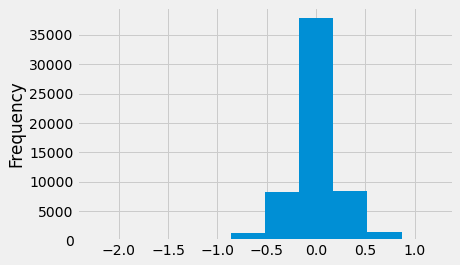

In [393]:
df_test.COL_13.plot.hist()

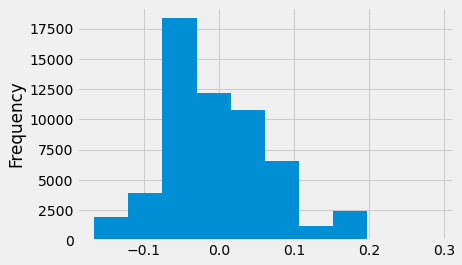

In [394]:
df_test.COL_15.plot.hist()

# Modeling

In [395]:
import re
df_train = df_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
df_test  = df_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

# df_train = df_train.drop(columns=['COL_17_month_year','COL_18_month_year'])
# df_test = df_test.drop(columns=['COL_17_month_year','COL_18_month_year'])



f2_train = df_train
X = f2_train.drop(columns=['label'])
y = f2_train['label']

In [396]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

### Turning random_sate

In [237]:
gini_score = []
random = []
for i in range(50,150):
    train = df_train.drop(columns=['msisdn', 'label'])
    y = df_train['label'].values
    x = train.values
    x, x_test, y, y_test = train_test_split(x, y, test_size=0.3, random_state=i, stratify=y)
    lgb_classifier = lgb.LGBMClassifier(n_estimator = 10000, 
                                        objective = 'binary', 
                                  num_leaves=32,
                                  learning_rate=0.05,
                                  max_bin = 55, bagging_fraction = 0.8,
                                  bagging_freq = 5, feature_fraction = 0.2319,
                                  feature_fraction_seed=9, bagging_seed=9,
                                  min_data_in_leaf =6, min_sum_hessian_in_leaf = 1
                                  )
    lgb_classifier

    model = lgb_classifier.fit(x, y, eval_metric = 'auc',
              eval_set = [(x_test, y_test), (x, y)],
              eval_names = ['valid', 'train'], 
              early_stopping_rounds = 100, verbose = 200)

    valid_score = lgb_classifier.best_score_['valid']['auc'] 
    train_score = lgb_classifier.best_score_['train']['auc'] 


    # valid_scores.append(valid_score)
    # train_scores.append(train_score)
    # print('fold time: {}; train score: {}; valid score: {}'.format(count, valid_score, train_score))
    print(f'gini_train: {2*train_score-1}, gini_valid: {2*valid_score-1}')
    gini_score.append((2*train_score-1,2*valid_score-1))
    random.append(i)

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	train's auc: 0.843336	train's binary_logloss: 0.239177	valid's auc: 0.752493	valid's binary_logloss: 0.268156
gini_train: 0.686672775861114, gini_valid: 0.5049866312150957
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	train's auc: 0.838306	train's binary_logloss: 0.240385	valid's auc: 0.757614	valid's binary_logloss: 0.267198
gini_train: 0.6766118137050328, gini_valid: 0.5152279779713826
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	train's auc: 0.844832	train's binary_logloss: 0.239347	valid's auc: 0.75073	valid's binary_logloss: 0.26833
gini_train: 0.6896633270833825, gini_valid: 0.5014603708544962
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	train's auc: 0.84382

KeyboardInterrupt: 

In [ ]:
for i,j in enumerate(gini_score):
    a , b = j
    print(" random_state: {} - train: {} - valid: {}".format(random[i], a, b) )

In [ ]:
random_state: 57 - train: 0.6324749683127577 - valid: 0.5225649171015267
random_state: 79 - train: 0.6296455810410679 - valid: 0.5283536839718184
random_state: 92 - train: 0.6405437489379857 - valid: 0.5111502529538978
            
random_state: 133 - train: 0.635867462047371 - valid: 0.5241715806308154
random_state: 157 - train: 0.6334281535275756 - valid: 0.5272747904694106
random_state: 159 - train: 0.6372866694928656 - valid: 0.5220210034155146
random_state: 173 - train: 0.6347638032398624 - valid: 0.5247928540148832
random_state: 181 - train: 0.633214327347408 - valid: 0.5234492806309363
random_state: 197 - train: 0.6318041873343079 - valid: 0.5231769879281702
random_state: 227 - train: 0.632070765865399 - valid: 0.5220858243491968
random_state: 243 - train: 0.6260123872871373 - valid: 0.5233689205856911

            
            

### Turning learning rate

In [ ]:
learning_rate = np.arange(0.01, 0.5, 0.01)
learning_rate

In [ ]:
gini_score_lr = []
lr_optimizer = []
for lr in learning_rate:
    train = df_train.drop(columns=['msisdn', 'label'])
    y = df_train['label'].values
    x = train.values
    x, x_test, y, y_test = train_test_split(x, y, test_size=0.2, random_state= 57, stratify=y)
    lgb_classifier = lgb.LGBMClassifier(n_estimator = 10000, 
                                        objective = 'binary', 
                                  num_leaves=32,
                                  learning_rate= lr,
                                  max_bin = 55, bagging_fraction = 0.8,
                                  bagging_freq = 5, feature_fraction = 0.2319,
                                  feature_fraction_seed=9, bagging_seed=9,
                                  min_data_in_leaf =6, min_sum_hessian_in_leaf = 1
                                       )
    lgb_classifier

    model = lgb_classifier.fit(x, y, eval_metric = 'auc',
              eval_set = [(x_test, y_test), (x, y)],
              eval_names = ['valid', 'train'], 
              early_stopping_rounds = 100, verbose = 200)

    valid_score = lgb_classifier.best_score_['valid']['auc'] 
    train_score = lgb_classifier.best_score_['train']['auc'] 


    # valid_scores.append(valid_score)
    # train_scores.append(train_score)
    # print('fold time: {}; train score: {}; valid score: {}'.format(count, valid_score, train_score))
    print(f'gini_train: {2*train_score-1}, gini_valid: {2*valid_score-1}')
    gini_score_lr.append((2*train_score-1,2*valid_score-1))
    lr_optimizer.append(lr)

In [ ]:
for i,j in enumerate(gini_score_lr):
    a , b = j
    print(" learing_rate: {} - Gini_train: {} - Gini_valid: {}".format(lr_optimizer[i], a, b) )

In [ ]:
(68, 0.2, 0.29)  train:0.7892085102773625   valid: 0.4606427624269791  đã submit
(79, 0.4, 0.29)  train:0.8294632151685981   valid: 0.48444053533538    đã submit
(68, 0.2, 0.19)  train:0.752282785378485    valid: 0.4671624914883705  đã submit
(131, 0.2, 0.11) train:0.6864273232981559   valid: 0.5410064330000359  đã submit
(79, 0.4, 0.09)  train:0.7003788992348083   valid: 0.5369284523327005  đã submit
        
random_state: 212 size: 0.1 learing_rate: 0.11 - train: 0.6696091728946292 - valid: 0.5640347736419231                        đã submit
random_state= 226 test_size=0.1 ,learing_rate: 0.09 - train: 0.6540681799075554 - valid: 0.5638636265986852                   đã submit
random_state= 284 test_size=0.1 learing_rate: 0.09999999999999999 - train: 0.6639578102224422 - valid: 0.5620977328387493     đã submit
random_state= 284 test_size=0.1 learing_rate: 0.21000000000000002 - train: 0.7371843416548187 - valid: 0.5614510977758045     đã submit
            
            
random_state: 61 test_size: 0.2 - learing_rate: 0.13 - train: 0.7006078478452236 - valid: 0.5391017094936028
random_state: 61 test_size: 0.2 - learing_rate: 0.09999999999999999 - train: 0.6735264910942422 - valid: 0.538425796509336
random_state: 64 test_size: 0.2 - learing_rate: 0.11 - train: 0.6879743503753648 - valid: 0.5461608966777767
random_state: 90 test_size: 0.2 -  learing_rate: 0.06999999999999999 - train: 0.6394696548206784 - valid: 0.5299121958212378                    
random_state: 93 test_size: 0.2 - learing_rate: 0.09999999999999999 - train: 0.6776481068350118 - valid: 0.5453005053220084                    
random_state: 110 test_size: 0.2 -  learing_rate: 0.11 - train: 0.6872129983391837 - valid: 0.5495912625882522                    
random_state: 131 test_size: 0.2 - learing_rate: 0.06999999999999999 - train: 0.6411140802779403 - valid: 0.5456501989033438
# random_state: 157 test_size: 0.2 -  learing_rate: 0.14 - train: 0.7093472742235689 - valid: 0.5679236103644769
random_state: 180 test_size: 0.2 - learing_rate: 0.09999999999999999 - train: 0.682175051876575 - valid: 0.5453628642081496                    
random_state: 218 test_size: 0.2 - learing_rate: 0.08 - train: 0.6498835171577779 - valid: 0.5414500232949861                    
# random_state: 226 test_size: 0.2 - learing_rate: 0.12 - train: 0.6986767076210463 - valid: 0.5440475038526322 


random_state: 57 test_size: 0.2 - learing_rate: 0.08 - Gini_train: 0.7216639232705648 - Gini_valid: 0.5251001684406695 


                 
            

### Submit model

In [ ]:
train = df_train.drop(columns=['msisdn', 'label'])
y = df_train['label'].values
x = train.values
x, x_test, y, y_test = train_test_split(x, y, test_size=0.2, random_state= 57, stratify=y)
lgb_classifier = lgb.LGBMClassifier(n_estimator = 10000, 
                                    objective = 'binary', 
                                  num_leaves=20,
                                  learning_rate=0.08,
                                  max_bin = 55, bagging_fraction = 0.8,
                                  bagging_freq = 5, feature_fraction = 0.2319,
                                  feature_fraction_seed=9, bagging_seed=9,
                                  min_data_in_leaf = 6 ,min_sum_hessian_in_leaf = 1
                                 )

lgb_classifier

model = lgb_classifier.fit(x, y, eval_metric = 'auc',
          eval_set = [(x_test, y_test), (x, y)],
          eval_names = ['valid', 'train'], 
          early_stopping_rounds = 100, verbose = 200)

valid_score = lgb_classifier.best_score_['valid']['auc'] 
train_score = lgb_classifier.best_score_['train']['auc'] 


# valid_scores.append(valid_score)
# train_scores.append(train_score)
# print('fold time: {}; train score: {}; valid score: {}'.format(count, valid_score, train_score))
print(f'gini_train: {2*train_score-1}, gini_valid: {2*valid_score-1}')


In [ ]:
msisdn = df_test['msisdn'].values
submission =df_test.drop(columns=['msisdn'])


X_predict = submission.values

y_predict = model.predict_proba(X_predict)[:,1]
output = pd.DataFrame({'msisdn': msisdn, 'label': y_predict})
print(output)

In [ ]:
output.to_csv('Light_GBM_version6_nonkFold_add_newfeature.csv', index=False,index_label=False)

In [ ]:
output

In [ ]:
test_submission

### Train model with K-Fold 

In [238]:
f2_train = df_train
X = f2_train.drop(columns=['label'])
y = f2_train['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=226)

f2_train = pd.concat([X_train,y_train], axis = 1)
f2_test = pd.concat([X_test,y_test], axis = 1)
f2_train.shape, f2_test.shape

gini, feature_importance_df = {}, pd.DataFrame()

TRAIN, TEST = f2_train.drop(['msisdn','label'], axis=1), f2_test.drop(['msisdn','label'], axis=1)
LABEL = f2_train['label']
preds, oof_preds = np.zeros(TRAIN.shape[0]), {}

cv = StratifiedKFold(n_splits= 3, shuffle=True)
for i, (train_idx, val_idx) in enumerate(cv.split(TRAIN, LABEL)):
    X_train, y_train = TRAIN.iloc[train_idx], LABEL.iloc[train_idx]
    X_val, y_val = TRAIN.iloc[val_idx], LABEL.iloc[val_idx]

    
    lgb_classifier = LGBMClassifier(n_estimator = 10000, 
                                    objective = 'binary', 
                                    num_leaves=20,
                                    learning_rate=  0.08,
                                    max_bin = 55, bagging_fraction = 0.8,
                                    bagging_freq = 5, feature_fraction = 0.2319,
                                    feature_fraction_seed=9, bagging_seed=9,
                                    min_data_in_leaf =6, 
                                    min_sum_hessian_in_leaf = 1
                                   )
    
    gbm = lgb_classifier.fit(X_train, y_train, eval_set=(X_val, y_val), 
                             early_stopping_rounds = 1000,
                             verbose = 200)

    y_pred = gbm.predict(X_val)
    y_pred_proba = gbm.predict_proba(X_val)[:, 1]

    preds[val_idx] = y_pred_proba
    oof_preds[f'Fold_{i+1}'] = gbm.predict_proba(TEST)[:, 1]

    gini[f'Fold_{i+1}'] = 2 * roc_auc_score(y_val, y_pred_proba) - 1

    # For create feature importances
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = TRAIN.columns
    fold_importance_df["importance"] = gbm.feature_importances_
    fold_importance_df["fold"] = i + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    print('Fold %2d gini_train : %.5f' % (i + 1, 2*roc_auc_score(y_val, y_pred_proba) - 1))

    roc_auc = roc_auc_score(LABEL, preds)
    print('Avg gini_valid:', 2*roc_auc - 1)

    result = np.array(list(gini.values()))
    print('GINI: {:.5f} +- {:.5f}'.format(result.mean(), result.std()))

Training until validation scores don't improve for 1000 rounds
Did not meet early stopping. Best iteration is:
[99]	valid_0's binary_logloss: 0.26498
Fold  1 gini_train : 0.51008
Avg gini_valid: 0.05656329274121008
GINI: 0.51008 +- 0.00000
Training until validation scores don't improve for 1000 rounds
Did not meet early stopping. Best iteration is:
[99]	valid_0's binary_logloss: 0.267771
Fold  2 gini_train : 0.49557
Avg gini_valid: 0.2231958070404092
GINI: 0.50283 +- 0.00726
Training until validation scores don't improve for 1000 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.265498
Fold  3 gini_train : 0.51730
Avg gini_valid: 0.5074535984063409
GINI: 0.50765 +- 0.00904


In [239]:
pd.DataFrame(oof_preds)

,Fold_1,Fold_2,Fold_3
0,0.064959,0.066634,0.044740
1,0.145973,0.129411,0.160396
2,0.015996,0.058700,0.027865
3,0.086766,0.096039,0.079575
4,0.049223,0.049345,0.054435
...,...,...,...
17312,0.049057,0.063302,0.066352
17313,0.064221,0.070764,0.084920
17314,0.099152,0.109708,0.074005
17315,0.025283,0.028019,0.026774


In [240]:
gini

{'Fold_1': 0.5100815873777063,
 'Fold_2': 0.4955690541232549,
 'Fold_3': 0.5172990070383152}

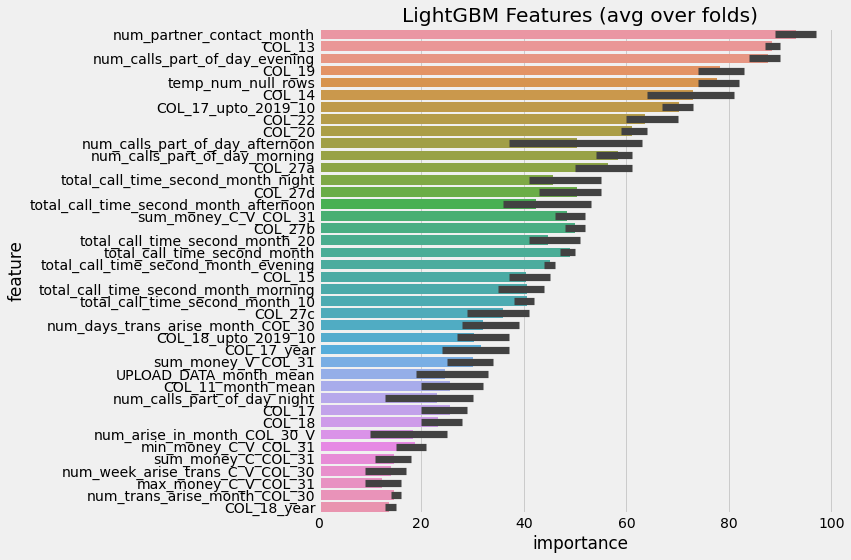

In [241]:
def display_importances(feature_importance_df_):

    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(
        by="importance", ascending=False)[:40].index
    
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x="importance", y="feature", 
                data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()

display_importances(feature_importance_df_=feature_importance_df)


## Predict 

In [242]:
test_data = df_test
test_data.shape

(57413, 64)

In [243]:
data = gbm.predict_proba(test_data.drop(columns = ['msisdn','Label']))[:,1]
submission = pd.DataFrame({'label': data})
submission = pd.concat([test_data['msisdn'],submission['label']], axis = 1)
submission.to_csv('Light_GBM_submission_kfold5_add_newfeature.csv', index=False,index_label=False)

In [244]:
submission

,msisdn,label
0,0001000cf619c9b3085d,0.069433
1,000100248d878d4558b2,0.057633
2,000100362c217ed2e556,0.042456
3,000100645e3a4bd29c68,0.062008
4,00010073f9bc66ef77d3,0.057243
...,...,...
57408,0001e5796e2195248577,0.071367
57409,0001e646841a1a424e9a,0.058858
57410,0001ead2f3d27418edf0,0.060360
57411,0001ede64d1753c7cceb,0.029180


In [245]:
test_submission

,msisdn,label,Label
0,0001000cf619c9b3085d,0.531734,0.0
1,000100248d878d4558b2,0.529381,0.0
2,000100362c217ed2e556,0.775374,1.0
3,000100645e3a4bd29c68,0.886796,1.0
4,00010073f9bc66ef77d3,0.346241,0.0
...,...,...,...
57408,0001e5796e2195248577,0.562003,0.0
57409,0001e646841a1a424e9a,0.919900,1.0
57410,0001ead2f3d27418edf0,0.627617,0.0
57411,0001ede64d1753c7cceb,0.600909,0.0


### Tuning LightBGM

In [397]:
#basic tools 
import os
import numpy as np
import pandas as pd
import warnings

#tuning hyperparameters
from bayes_opt import BayesianOptimization
from skopt  import BayesSearchCV 

#graph, plots
import matplotlib.pyplot as plt
import seaborn as sns

#building models
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
import time
import sys

#metrics 
from sklearn.metrics import roc_auc_score, roc_curve

In [398]:
X=df_train.drop(['msisdn','label'],axis=1)
y=df_train['label']

In [399]:
def bayes_parameter_opt_lgb(X, y, init_round=15, opt_round=25, n_folds=3, random_seed=6,n_estimators=10000, output_process=False):
    # prepare data
    train_data = lgb.Dataset(data=X, label=y, free_raw_data=False)
    # parameters
    def lgb_eval(learning_rate,num_leaves, feature_fraction, bagging_fraction, max_depth, max_bin, min_data_in_leaf,min_sum_hessian_in_leaf,subsample):
        params = {'application':'binary', 'metric':'auc'}
        params['learning_rate'] = max(min(learning_rate, 1), 0)
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['max_bin'] = int(round(max_depth))
        params['min_data_in_leaf'] = int(round(min_data_in_leaf))
        params['min_sum_hessian_in_leaf'] = min_sum_hessian_in_leaf
        params['subsample'] = max(min(subsample, 1), 0)
        
        cv_result = lgb.cv(params, train_data, nfold=n_folds, seed=random_seed, stratified=True, verbose_eval =200, metrics=['auc'])
        return max(cv_result['auc-mean'])
     
    lgbBO = BayesianOptimization(lgb_eval, {'learning_rate': (0.01, 0.9),
                                            'num_leaves': (24, 80),
                                            'feature_fraction': (0.1, 0.9),
                                            'bagging_fraction': (0.8, 1),
                                            'max_depth': (5, 30),
                                            'max_bin':(20,90),
                                            'min_data_in_leaf': (20, 80),
                                            'min_sum_hessian_in_leaf':(0,100),
                                           'subsample': (0.01, 1.0)}, random_state=212)

    
    #n_iter: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.
    #init_points: How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space.
    
    lgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
    model_auc=[]
    for model in range(len( lgbBO.res)):
        model_auc.append(lgbBO.res[model]['target'])
    
    # return best parameters
    return lgbBO.res[pd.Series(model_auc).idxmax()]['target'],lgbBO.res[pd.Series(model_auc).idxmax()]['params']

opt_params = bayes_parameter_opt_lgb(X, y, init_round=5, opt_round=10, n_folds=5, random_seed=6,n_estimators=10000)

|   iter    |  target   | baggin... | featur... | learni... |  max_bin  | max_depth | min_da... | min_su... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.7594   |  0.8466   |  0.8294   |  0.05542  |  20.7     |  12.83    |  38.18    |  14.02    |  44.25    |  0.2485   |
|  2        |  0.7572   |  0.9944   |  0.316    |  0.1965   |  22.51    |  25.84    |  57.19    |  92.33    |  41.29    |  0.03142  |
|  3        |  0.7399   |  0.9667   |  0.2627   |  0.6815   |  29.92    |  8.152    |  22.63    |  80.44    |  28.52    |  0.9265   |
|  4        |  0.737    |  0.9241   |  0.6584   |  0.5436   |  85.25    |  28.64    |  50.7     |  39.23    |  55.81    |  0.01158  |
|  5        |  0.7464   |  0.9708   |  0.5779   |  0.6701   |  68.0     |  24.5     |  66.74    |  97.64    |  44.65    |  0.1958   |
|  6        |  0.7286   |  0.9947   |  0.4216   |  0.6121   | 

In [400]:
opt_params[1]

{'bagging_fraction': 0.8078545232183156,
 'feature_fraction': 0.6503713233448503,
 'learning_rate': 0.07365258725233893,
 'max_bin': 63.43144937194707,
 'max_depth': 23.294275459833354,
 'min_data_in_leaf': 65.68546304331645,
 'min_sum_hessian_in_leaf': 31.276579851078644,
 'num_leaves': 41.9791277147006,
 'subsample': 0.3698476928449988}

In [401]:
opt_params[1]["num_leaves"] = int(round(opt_params[1]["num_leaves"]))
opt_params[1]['max_depth'] = int(round(opt_params[1]['max_depth']))
opt_params[1]['min_data_in_leaf'] = int(round(opt_params[1]['min_data_in_leaf']))
opt_params[1]['max_bin'] = int(round(opt_params[1]['max_bin']))
opt_params[1]['objective']='binary'
opt_params[1]['metric']='auc'
opt_params[1]['is_unbalance']=True
opt_params[1]['boost_from_average']=False
opt_params=opt_params[1]
opt_params

{'bagging_fraction': 0.8078545232183156,
 'feature_fraction': 0.6503713233448503,
 'learning_rate': 0.07365258725233893,
 'max_bin': 63,
 'max_depth': 23,
 'min_data_in_leaf': 66,
 'min_sum_hessian_in_leaf': 31.276579851078644,
 'num_leaves': 42,
 'subsample': 0.3698476928449988,
 'objective': 'binary',
 'metric': 'auc',
 'is_unbalance': True,
 'boost_from_average': False}

### Trainning LightGBM

In [410]:
target=df_train['label']
features= [c for c in df_train.columns if c not in ['label','msisdn']]

folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=212)
oof = np.zeros(len(df_train))
predictions = np.zeros(len(df_test))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(df_train.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(df_train.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 15000
    clf = lgb.train(opt_params, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=500, early_stopping_rounds = 250)
    oof[val_idx] = clf.predict(df_train.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(df_test[features], num_iteration=clf.best_iteration) / folds.n_splits

print("Gini score: {:<8.5f}".format(2*roc_auc_score(target, oof)-1))


Fold 0
Training until validation scores don't improve for 250 rounds
Early stopping, best iteration is:
[151]	training's auc: 0.91219	valid_1's auc: 0.749909
Fold 1
Training until validation scores don't improve for 250 rounds
Early stopping, best iteration is:
[136]	training's auc: 0.902671	valid_1's auc: 0.774396
Fold 2
Training until validation scores don't improve for 250 rounds
Early stopping, best iteration is:
[73]	training's auc: 0.859285	valid_1's auc: 0.754577
Fold 3
Training until validation scores don't improve for 250 rounds
Early stopping, best iteration is:
[186]	training's auc: 0.927189	valid_1's auc: 0.759932
Fold 4
Training until validation scores don't improve for 250 rounds
Early stopping, best iteration is:
[129]	training's auc: 0.897383	valid_1's auc: 0.765343
Fold 5
Training until validation scores don't improve for 250 rounds
Early stopping, best iteration is:
[62]	training's auc: 0.849324	valid_1's auc: 0.758769
Fold 6
Training until validation scores don't imp

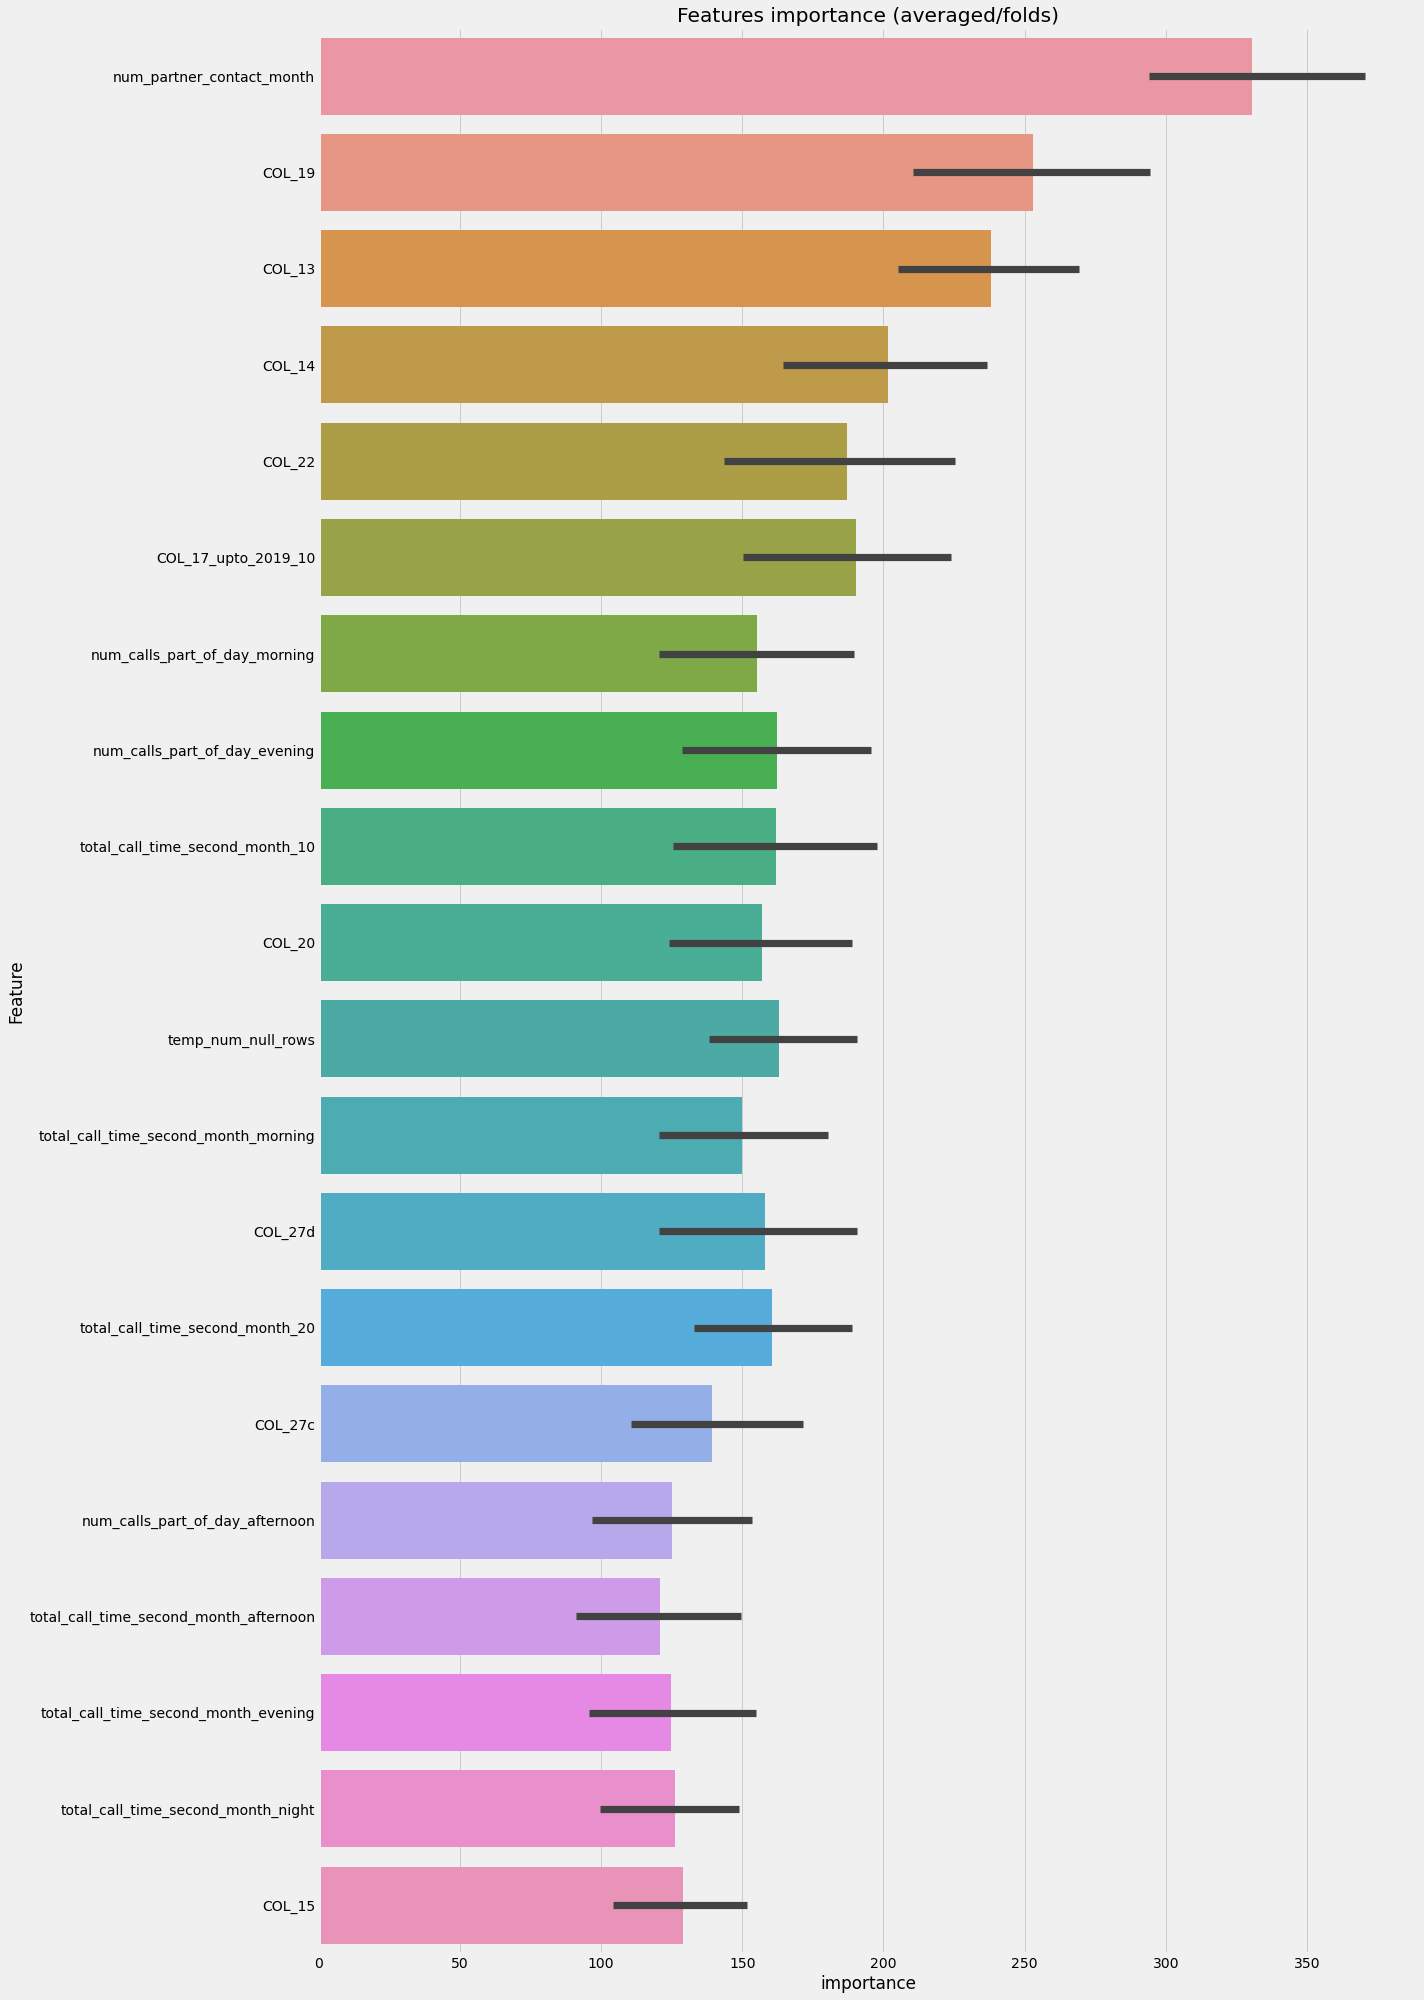

In [417]:
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:20].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(20,28))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()
plt.savefig('Feature_Importance.png')

In [418]:
predictions.shape, df_test.shape

((57413,), (57413, 61))

In [419]:
output = pd.DataFrame({'msisdn': df_test['msisdn'].values, 'label': predictions})

In [423]:
output[:10]

,msisdn,label
0,0001000cf619c9b3085d,0.365281
1,000100248d878d4558b2,0.210707
2,000100362c217ed2e556,0.204638
3,000100645e3a4bd29c68,0.215807
4,00010073f9bc66ef77d3,0.283586
5,0001007f55868929b199,0.206318
6,0001007fd6b6cb656189,0.456721
7,00010090c21db173c4ff,0.316221
8,00010097cccbedd176ea,0.407429
9,0001009ad862ca36eaf2,0.094169


In [424]:
test_submission[:10]

,msisdn,label
0,0001000cf619c9b3085d,0.531734
1,000100248d878d4558b2,0.529381
2,000100362c217ed2e556,0.775374
3,000100645e3a4bd29c68,0.886796
4,00010073f9bc66ef77d3,0.346241
5,0001007f55868929b199,0.520374
6,0001007fd6b6cb656189,0.214403
7,00010090c21db173c4ff,0.187099
8,00010097cccbedd176ea,0.997690
9,0001009ad862ca36eaf2,0.276936


In [422]:
output.to_csv('lightgbm_version15.csv', index=False,index_label=False)
# submission.to_csv('Light_GBM_submission_kfold5_add_newfeature.csv', index=False,index_label=False)
# submission.to_csv('Light_GBM_submission_kfold5_add_newfeature.csv', index=False,index_label=False)